# 1 Tensors

In chapter *1 - Introduction* of the lecture, we recapitulated tensor notation and tensor analysis. In this exercise, we will gain some more confidence in working with tensors on paper, but also in code. 

To solve the tasks with code, we will use PyTorch, a powerful Python package to operate on tensors. In comparison to NumPy, it stores gradients together with tensors and thus allows automatic differentiation. The package is used widely for machine learning and optimization. For installation it is best to create a new conda environement via
```
    conda create -n pytorch python=3.10
```
we can than activate that environment
```
    conda activate pytorch
``` 
and then use 
```
    conda install matplotlib pytorch torchvision jupyter jupyter-lab
```
to install the required packages. After that, you should be able to import the torch package in a Jupyter Notebook:

In [1]:
import torch

## Task 1 - Vector products

Given two vectors $\mathbf{a}, \mathbf{b} \in \mathcal{R}^3$ denote the scalar product, cross product and outer product in index notation. 

> Scalar product: $$a_i b_i$$
> Cross product: $$\epsilon_{ijk} a_j b_k$$
> Outer product: $$a_i b_j$$

Given the values 
$$
\mathbf{a} = \begin{pmatrix}2\\1\\3\end{pmatrix} \quad \mathbf{b} = \begin{pmatrix}5\\0\\1\end{pmatrix}
$$
define the vectors in torch and compute the scalar product, cross product and outer product. 


In [2]:
a = torch.tensor([2., 1., 3.])
b = torch.tensor([5., 0., 1.])

In [3]:
print("Inner product:")
print(torch.matmul(a,b)) # Equivalent to a @ b, torch.dot(a,b), torch.inner(a,b)

Inner product:
tensor(13.)


In [4]:
print("Cross product:")
print(torch.cross(a,b))

Cross product:
tensor([ 1., 13., -5.])


In [5]:
print("Outer product:")
print(torch.outer(a,b))

Outer product:
tensor([[10.,  0.,  2.],
        [ 5.,  0.,  1.],
        [15.,  0.,  3.]])


## Task 2 - Index notation
Compute the resuls of the following expressions in $\mathcal{R}^3$:

a) $$\delta_{ii}$$

b) $$\delta_{ij} \delta_{ij}$$

c) $$\epsilon_{ijk}\epsilon_{ijk}$$

> $$\delta_{ii} = 3$$
> $$\delta_{ij} \delta_{ij} = \delta_{ii}=3$$
> $$\epsilon_{ijk}\epsilon_{ijk} = \delta_{kk} \delta_{jj} - \delta_{jk}\delta_{jk} = 6$$


Simplify the following expression in $\mathcal{R}^3$ and write it in symbolic notation:
$$a_i = \delta_{jl} \delta_{km} \epsilon_{ilm} b_j c_k$$

> Simplify:
> $$
>     a_i = \delta_{jl} \delta_{km} \epsilon_{ilm} b_j c_k \\
>     = \epsilon_{ijk} b_j c_k \\
> $$ 
> Symbolic notation: 
> $$
>     \mathbf{a} = \mathbf{b} \times \mathbf{c} \\
> $$ 


## Task 3 - Tensor products
Given the tensors $\mathbf{A}, \mathbf{B} \in \mathcal{R}^{3 \times 3}$ and $\mathbb{C} \in \mathcal{R}^{3 \times 3 \times 3 \times 3}$ convert the following expressions to index notation and determine the dimensions of the resulting tensor: 
a)  $$\mathbf{a} \cdot \mathbf{A} \cdot \mathbf{b}$$
b) $$\mathbf{b} \cdot \mathbf{A} \cdot \mathbf{a}$$
c) $$\mathbf{A} \cdot \mathbf{B} \cdot \mathbf{b}$$
d) $$(\mathbf{A} : \mathbf{B}) \mathbf{b}$$
e) $$(\mathbf{a} \otimes \mathbf{b}) : \mathbf{B}$$
f) $$\mathbf{A} \otimes \mathbb{C} : \mathbf{B}$$


> a) Result in $\mathcal{R}$ $$a_i A_{ij} b_j$$ 
> b) Result in $\mathcal{R}$ $$b_i A_{ij} a_j$$
> c) Result in $\mathcal{R}^d$ $$A_{ij} B_{jk} b_k$$
> d) Result in $\mathcal{R}^d$ $$A_{ij} B_{ij} b_k$$
> e) Result in $\mathcal{R}$ $$a_i b_j B_{ij}$$
> f) Result in $\mathcal{R}^{d \times d}$ $$A_{ij} C_{klmn} B_{mn}$$

Convert the following expressions to index notation and determine the dimensions of the resulting tensor: 

g) $$A_{zj}b_z$$
h) $$A_{ij}B_{jk}a_k$$
i) $$C_{mnop}A_{po}\delta_{ni}a_{i}$$

> Result in $\mathcal{R}^d$ $$\mathbf{A}^\top \mathbf{b}$$
> Result in $\mathcal{R}^d$ $$\mathbf{A} \cdot \mathbf{B} \cdot \mathbf{a}$$
> Result in $\mathcal{R}^d$ $$(\mathbb{C} : \mathbf{A}^\top) \cdot \mathbf{a}$$

Given the values 
$$
\mathbf{A} = 
\begin{pmatrix}
    6 & 2 & 1\\
    4 & 7 & 6\\
    0 & 2 & 9
\end{pmatrix} 
\quad 
\mathbf{B} = 
\begin{pmatrix}
    5 & 7 & 11\\
    0 & 4 & 3\\
    1 & 2 & 9
\end{pmatrix}
\quad 
C_{ijkl} = 1 \forall i,j,k,l
$$
define the tensors in torch and compute the expressions above. Reuse $\mathbf{a}$ and $\mathbf{b}$ from the first task.

*Tips:* 
- What we denote with $\cdot$ in the lecture, can be written with an `@` in numpy and torch.
- What we denote with $:$ in the lhe lecture, can be written with `torch.tensordot` in numpy and torch.
- Multiplication between scalars is done simply by `*`.
- We can use `torch.einsum()` to define arbitrary expressions using Einstein's summation convention

In [6]:
A = torch.tensor([[6.,2.,1.],[4.,7.,6.],[0.,2.,9.]])
B = torch.tensor([[5.,7.,11.],[0.,4.,3.],[1.,2.,9.]])
I = torch.eye(3)
C = torch.ones((3,3,3,3))

print(a @ A @ b)
print(b @ A @ a)
print(A @ B @ b)
print(torch.tensordot(A,B) * b)
print(torch.tensordot(torch.outer(a,b),B))
print(torch.einsum("ij,klmn,mn", A, C, B).shape)


tensor(115.)
tensor(114.)
tensor([236., 249., 132.])
tensor([930.,   0., 186.])
tensor(117.)
torch.Size([3, 3, 3, 3])


In [7]:
print(torch.einsum("zj,z", A, a))
print(torch.einsum("ij,jk,k", A, B, a))
print(torch.einsum("mnop,po,ni, i", C, A, I, a))

tensor([16., 17., 35.])
tensor([357., 477., 305.])
tensor([222., 222., 222.])


## Task 4 - Tensor analysis

Show the following identity for fields $\rho: \mathcal{R}^3 \rightarrow \mathcal{R}$ and $\mathbf{u}: \mathcal{R}^3 \rightarrow \mathcal{R}^2$ using index notation.

$$
\nabla \cdot (\rho \mathbf{u}) = \nabla \rho \cdot \mathbf{u} + \rho \nabla \cdot \mathbf{u}
$$

> $$
>   \frac{\partial (\rho u_i)}{\partial x_i} = \frac{\partial \rho}{\partial x_i} u_i + \rho \frac{\partial u_i}{x_i}
> $$

## Task 5 - Gradients
Given the vectorfield $f: \mathcal{R}^2 \rightarrow \mathcal{R}$ defined as 

$$
f(\mathbf{x}) = (\mathbf{x} - \tilde{\mathbf{x}}) \cdot \mathbf{Q} \cdot (\mathbf{x} - \tilde{\mathbf{x}})
$$
with 
$$
\mathbf{Q} = 
\begin{pmatrix}
    2 & 1 \\
    1 & 1 
\end{pmatrix} 
\quad 
\text{and}
\quad
\tilde{\mathbf{x}} = 
\begin{pmatrix}
    -1\\
    1 
\end{pmatrix}
$$
compute the gradient analytically.

> The function can be rewritten to 
> $$
>   f(x_1, x_2) = 2(x_1+1)^2 + 2(x_1+1)(x_2-1) + (x_2-1)^2.
> $$
> Then, we can compute 
> $$
>   \frac{\partial f}{\partial x_1} = 4 (x_1+1) + 2(x_2-1)
> $$
> and
> $$
>   \frac{\partial f}{\partial x_2} = 2(x_1+1) + 2(x_2-1)
> $$
> Finally, the gradient is 
> $$
> \nabla f = 
> \begin{pmatrix}
>   \frac{\partial f}{\partial x_1} \\
>   \frac{\partial f}{\partial x_2} \\
> \end{pmatrix}= 
> \begin{pmatrix}
>   4 x_1 + 2 x_2 + 2 \\
>   2x_1 + 2 x_2 \\
> \end{pmatrix}
> $$

Doing these computations by hand takes a while. Therefore we take a look at how to compute gradients using PyTorch. To do so, we start by defining $\mathbf{Q}$, $\tilde{\mathbf{x}}$ and the function $f(\mathbf{x})$. The function $f(\mathbf{x})$ can be implemented in a straight forward way and you should try a straight forward implementation first. 

However, we would like to be able to evaluate the function for many values of $\mathbf{x}$ at the same time. This is equivalent to passing a tensor of the shape $\mathcal{R}^{... \times 2}$ with arbitray dimensions except the last axis. This can be implemented using an ellipsis `...` in `torch.einsum()`.

In [8]:
xt = torch.tensor([-1., .1])
Q = torch.tensor([[2., 1.],[1, 1.]])

def f(x):
    dx = x - xt
    return  torch.einsum("...i,ij,...j", dx, Q, dx)

If your function is defined correctly, the following cell should plot the function values as a contour plot.

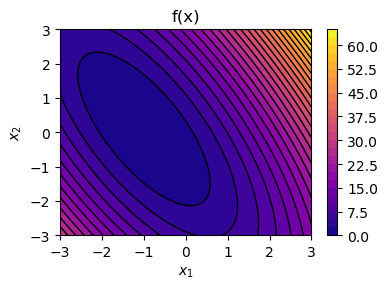

In [9]:
from utils import plot_contours 

# Define x
x0 = torch.linspace(-3, 3, steps=100, requires_grad=True)
x1 = torch.linspace(-3, 3, steps=100, requires_grad=True)
x = torch.stack(torch.meshgrid(x0, x1, indexing='xy'), dim=2)

plot_contours(x[:,:,0],x[:,:,1],f(x), title="f(x)")

Now, lets compute the actual gradients with automatic differentiation:

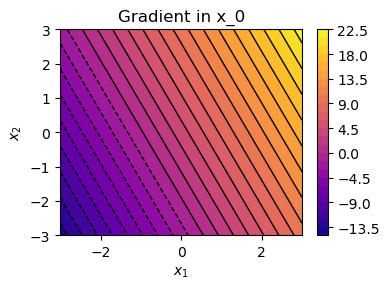

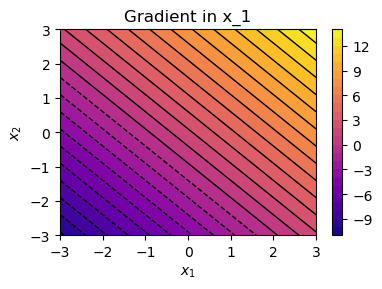

In [10]:
dfdx = torch.autograd.grad(f(x).sum(), x)[0]

plot_contours(x[:,:,0],x[:,:,1], dfdx[:,:,0], title="Gradient in x_0")
plot_contours(x[:,:,0],x[:,:,1], dfdx[:,:,1], title="Gradient in x_1")
